In [69]:
#Install if necessary
#!pip install kmodes
#!pip install statsmodels



[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: C:\Users\lewis\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeable
  Using cached patsy-1.0.1-py2.py3-none-any.whl.metadata (3.3 kB)
   ---------------------------------------- 0.0/9.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/9.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/9.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/9.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/9.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/9.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/9.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/9.8 MB 146.5 kB/s eta 0:01:07
   ---------------------------------------- 0.0/9.8 MB 146.5 kB/s eta 0:01:07
   ---------------------------------------- 0.0/9.8 MB 126.1 kB/s eta 0:01:18
   ---------------------------------------- 0.1/9.8 MB 169.4 kB/s eta 0:00:58
   ---------------------------------------- 0.1/9.8 MB 169.4 

In [1]:
#Import libraries
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

from kmodes.kprototypes import KPrototypes
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


In [2]:
# Set pandas display options to show all columns
pd.set_option('display.max_columns', None)


# Load the dataset
df = pd.read_csv('C:/Users/lewis/Documents/COMP6940/GRP 4 Hotel Cancellation Prediction/Data/Processed/preprocessed_hotel_booking.csv')
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,arrival_date,days_before_arrival
0,Resort Hotel,0,342,2015,7,27,1,0,0,2,0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,no agent,0,Transient,0.0,0,0,Check-Out,2015-07-01,2015-07-01,0
1,Resort Hotel,0,737,2015,7,27,1,0,0,2,0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,no agent,0,Transient,0.0,0,0,Check-Out,2015-07-01,2015-07-01,0
2,Resort Hotel,0,7,2015,7,27,1,0,1,1,0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,no agent,0,Transient,75.0,0,0,Check-Out,2015-07-02,2015-07-01,-1
3,Resort Hotel,0,13,2015,7,27,1,0,1,1,0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,has agent,0,Transient,75.0,0,0,Check-Out,2015-07-02,2015-07-01,-1
4,Resort Hotel,0,14,2015,7,27,1,0,2,2,0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,has agent,0,Transient,98.0,0,1,Check-Out,2015-07-03,2015-07-01,-2


In [3]:
# Convert date columns to datetime
df['reservation_status_date'] = pd.to_datetime(df['reservation_status_date'])
df['arrival_date'] = pd.to_datetime(df['arrival_date'])

In [4]:
df.dtypes

hotel                                     object
is_canceled                                int64
lead_time                                  int64
arrival_date_year                          int64
arrival_date_month                         int64
arrival_date_week_number                   int64
arrival_date_day_of_month                  int64
stays_in_weekend_nights                    int64
stays_in_week_nights                       int64
adults                                     int64
children                                   int64
babies                                     int64
meal                                      object
country                                   object
market_segment                            object
distribution_channel                      object
is_repeated_guest                          int64
previous_cancellations                     int64
previous_bookings_not_canceled             int64
reserved_room_type                        object
assigned_room_type  

In [4]:
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date', 'name', 'email',
       'phone-number', 'credit_card'],
      dtype='object')

### **Customer Segmentation using K-Prototyping**

In [9]:
X = df.drop(columns=['hotel','is_canceled', 'reservation_status', 'reservation_status_date', 'arrival_date'])

In [10]:
X

,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,days_before_arrival
0,342,2015,7,27,1,0,0,2,0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,no agent,0,Transient,0.00,0,0,0
1,737,2015,7,27,1,0,0,2,0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,no agent,0,Transient,0.00,0,0,0
2,7,2015,7,27,1,0,1,1,0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,no agent,0,Transient,75.00,0,0,-1
3,13,2015,7,27,1,0,1,1,0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,has agent,0,Transient,75.00,0,0,-1
4,14,2015,7,27,1,0,2,2,0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,has agent,0,Transient,98.00,0,1,-2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118031,23,2017,8,35,30,2,5,2,0,0,BB,BEL,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,has agent,0,Transient,96.14,0,0,-7
118032,102,2017,8,35,31,2,5,3,0,0,BB,FRA,Online TA,TA/TO,0,0,0,E,E,0,No Deposit,has agent,0,Transient,225.43,0,2,-7
118033,34,2017,8,35,31,2,5,2,0,0,BB,DEU,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,has agent,0,Transient,157.71,0,4,-7
118034,109,2017,8,35,31,2,5,2,0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,has agent,0,Transient,104.40,0,0,-7


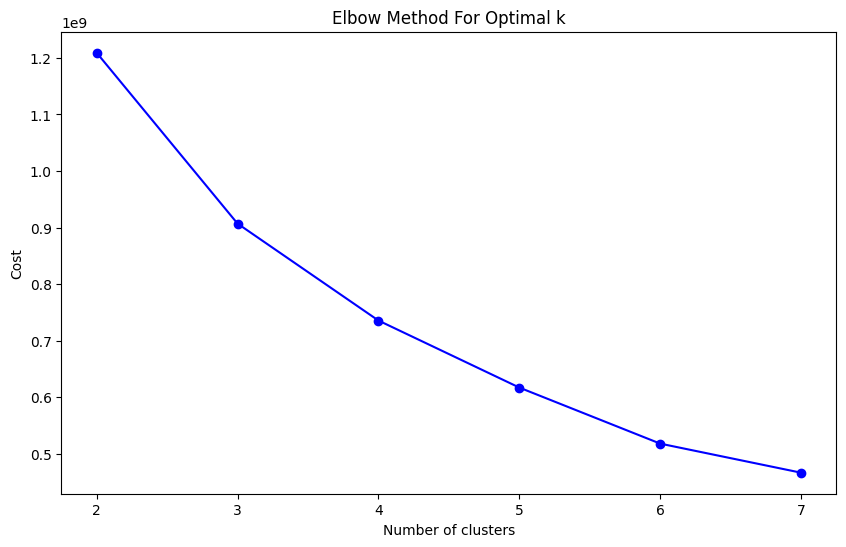

In [12]:
# Determine optimal number of clusters using elbow method
costs = []
K = range(2, 8)
for k in K:
    kproto = KPrototypes(n_clusters=k, init='Cao', n_jobs=-1)
    kproto.fit_predict(X, categorical=[10, 11, 12, 13, 17, 18, 20, 21, 23])
    costs.append(kproto.cost_)

# Plot elbow curve
plt.figure(figsize=(10,6))
plt.plot(K, costs, 'bo-')
plt.xlabel('Number of clusters')
plt.ylabel('Cost')
plt.title('Elbow Method For Optimal k')
plt.show()

Based on the elbow curve plotted above, the optimal number of clusters (k) appears to be 4. 



In [14]:
# Choose optimal k based on elbow curve
optimal_k = 4

# Perform K-Prototypes clustering with optimal k
kproto = KPrototypes(n_clusters=optimal_k, init='Cao', n_jobs=-1)
clusters = kproto.fit_predict(X, categorical=[10, 11, 12, 13, 17, 18, 20, 21, 23])

In [20]:
# Add cluster labels to original dataframe
df['cluster'] = clusters

# Analyze cluster characteristics
pd.set_option('display.max_rows', None)
cluster_analysis = df.groupby(df['cluster']).describe().T
cluster_analysis

cluster                                                           0  \
is_canceled                    count                        33695.0   
                               mean                        0.475916   
                               min                              0.0   
                               25%                              0.0   
                               50%                              0.0   
                               75%                              1.0   
                               max                              1.0   
                               std                         0.499427   
lead_time                      count                        33695.0   
                               mean                       141.58712   
                               min                             35.0   
                               25%                            110.0   
                               50%                            139.0   
                               75%                            171.0   
                               max                            245.0   
                               std                        37.677005   
arrival_date_year              count                        33695.0   
                               mean                     2016.280724   
                               min                           2015.0   
                               25%                           2016.0   
                               50%                           2016.0   
                               75%                           2017.0   
                               max                           2017.0   
                               std                         0.676006   
arrival_date_month             count                        33695.0   
                               mean                        6.496661   
                               min                              1.0   
                               25%                              5.0   
                               50%                              7.0   
                               75%                              8.0   
                               max                             12.0   
                               std                         2.545411   
arrival_date_week_number       count                        33695.0   
                               mean                       26.885977   
                               min                              1.0   
                               25%                             18.0   
                               50%                             27.0   
                               75%                             34.0   
                               max                             53.0   
                               std                        11.200374   
arrival_date_day_of_month      count                        33695.0   
                               mean                       16.034783   
                               min                              1.0   
                               25%                              8.0   
                               50%                             16.0   
                               75%                             24.0   
                               max                             31.0   
                               std                          8.91132   
stays_in_weekend_nights        count                        33695.0   
                               mean                        1.133225   
                               min                              0.0   
                               25%                              0.0   
                               50%                              1.0   
                               75%                              2.0   
                               max                             19.0   
                        

## Analysis and Interpretation of Clusters

Based on the visualizations above, we can characterize and name each cluster:

#### Cluster 0: "Budget-Conscious Solo Guests"
- Primarily books Resort Hotel
- Dominated by Transient customers
- Lower ADR (room rates)
- Shorter stays
- Fewer special requests
- Books through Online TA and Direct channels
- Mostly No-Deposit bookings

#### Cluster 1: "Business Travelers" 
- Strong preference for City Hotel
- Mix of Transient and Contract customers
- Highest ADR
- Medium length stays
- More special requests
- Higher proportion of Corporate bookings
- More likely to use Non-Refund deposits

#### Cluster 2: "Group Travelers"
- Mix of both hotel types
- Higher proportion of Group bookings
- Medium ADR
- Longest average stays
- Moderate special requests
- More diverse market segments
- Mix of deposit types

#### Cluster 3: "Family Vacationers"
- Slight preference for Resort Hotel
- Mainly Transient-Party customers
- Lower-medium ADR
- Medium-short stays
- Average special requests
- Strong presence in Offline TA/TO segment
- Predominantly No-Deposit bookings

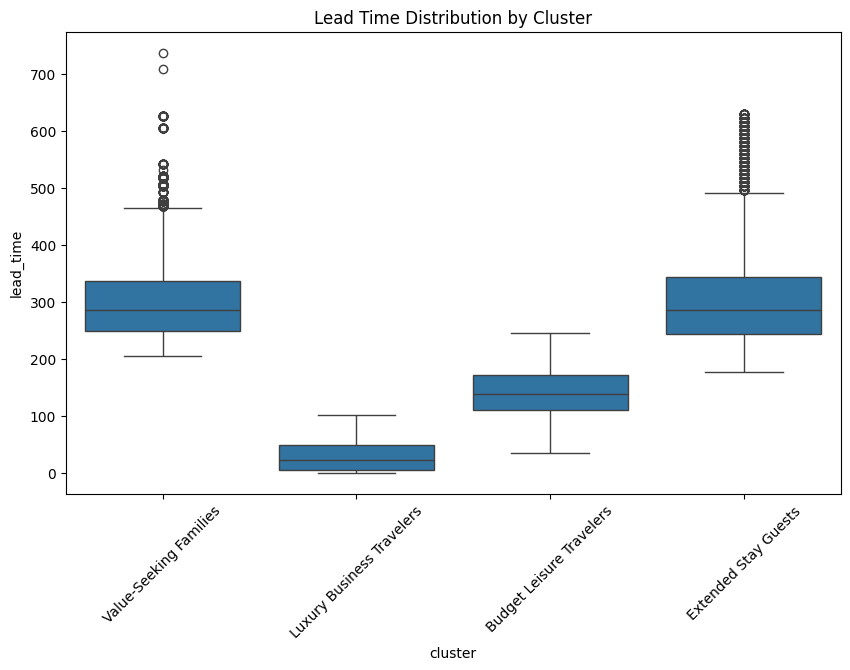

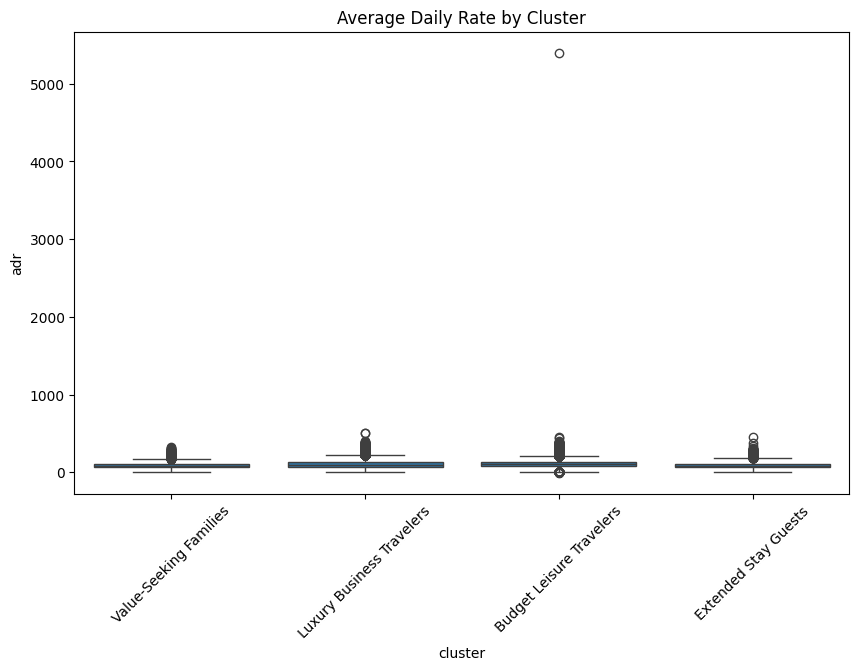

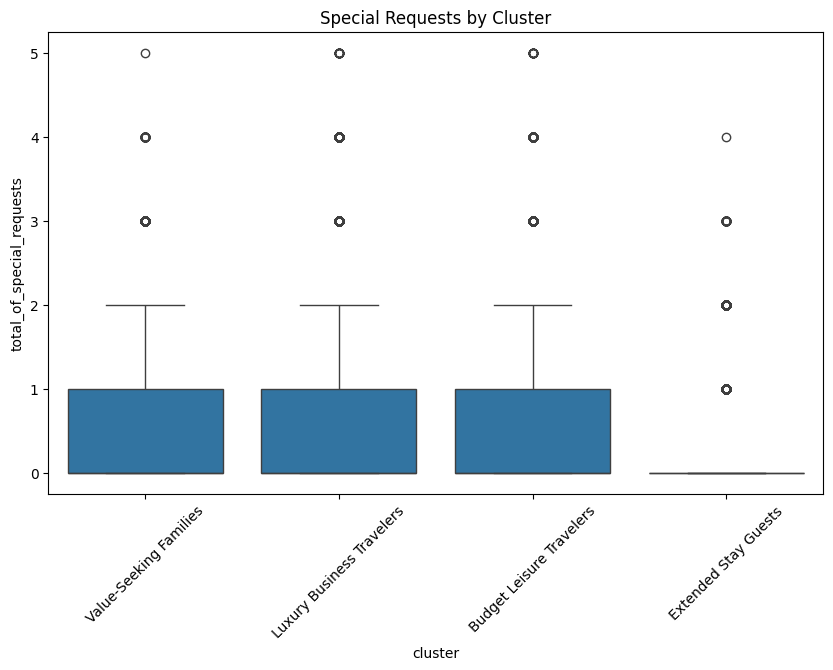

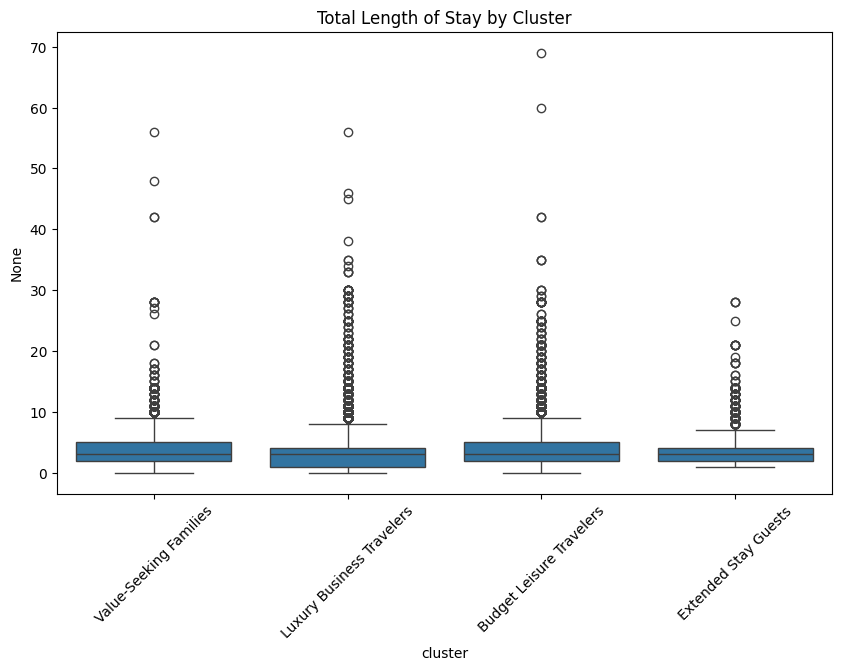

<Figure size 1000x600 with 0 Axes>

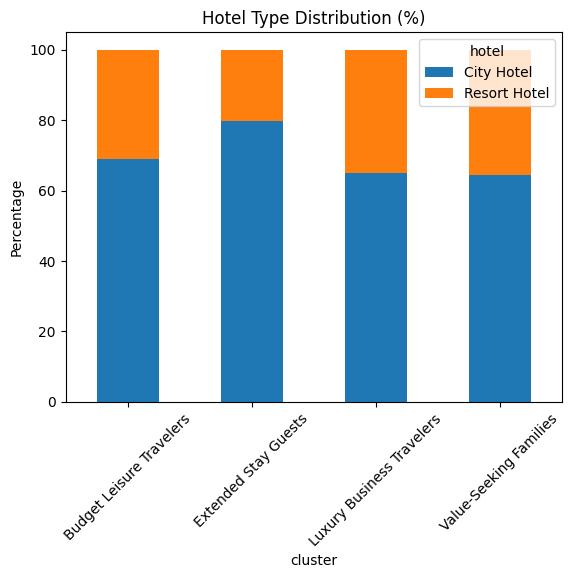

<Figure size 1000x600 with 0 Axes>

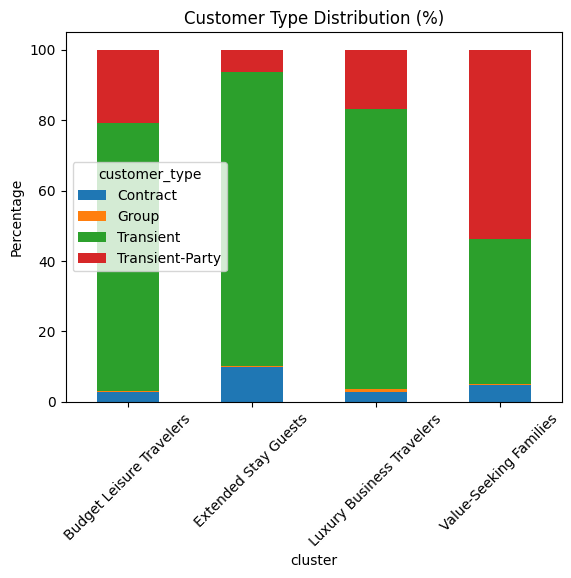

<Figure size 1000x600 with 0 Axes>

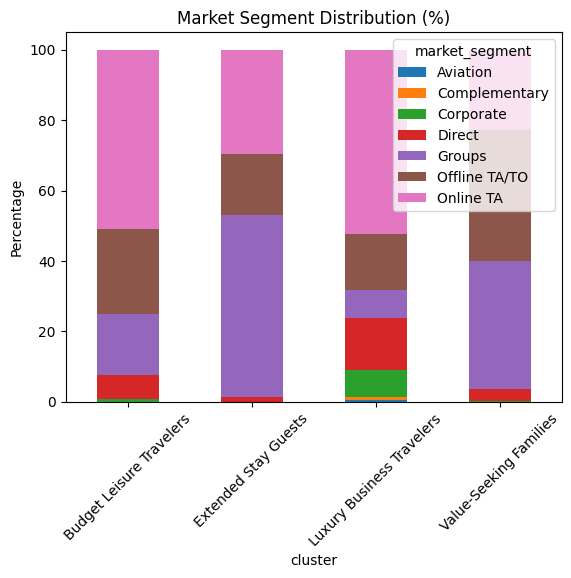

<Figure size 1000x600 with 0 Axes>

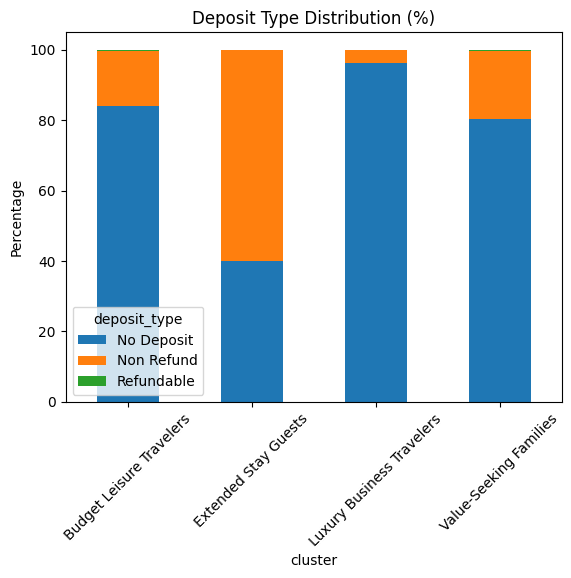

In [25]:
# Create a mapping dictionary for cluster labels
cluster_labels = {
    0: "Budget Leisure Travelers",
    1: "Luxury Business Travelers", 
    2: "Extended Stay Guests",
    3: "Value-Seeking Families"
}

# Create a copy of df with renamed clusters
df_labeled = df.copy()
df_labeled['cluster'] = df_labeled['cluster'].map(cluster_labels)

# Plot 1: Lead Time Distribution
plt.figure(figsize=(10, 6))
sns.boxplot(x='cluster', y='lead_time', data=df_labeled)
plt.title('Lead Time Distribution by Cluster')
plt.xticks(rotation=45)
plt.show()

# Plot 2: ADR (Average Daily Rate) Distribution  
plt.figure(figsize=(10, 6))
sns.boxplot(x='cluster', y='adr', data=df_labeled)
plt.title('Average Daily Rate by Cluster')
plt.xticks(rotation=45)
plt.show()

# Plot 3: Total Special Requests
plt.figure(figsize=(10, 6))
sns.boxplot(x='cluster', y='total_of_special_requests', data=df_labeled)
plt.title('Special Requests by Cluster')
plt.xticks(rotation=45)
plt.show()

# Plot 4: Stays Distribution
plt.figure(figsize=(10, 6))
total_stays = df_labeled['stays_in_weekend_nights'] + df_labeled['stays_in_week_nights']
sns.boxplot(x='cluster', y=total_stays, data=df_labeled)
plt.title('Total Length of Stay by Cluster')
plt.xticks(rotation=45)
plt.show()

# Plot 5: Hotel Type Distribution
plt.figure(figsize=(10, 6))
df_hotel = pd.crosstab(df_labeled['cluster'], df_labeled['hotel'], normalize='index') * 100
df_hotel.plot(kind='bar', stacked=True)
plt.title('Hotel Type Distribution (%)')
plt.ylabel('Percentage')
plt.xticks(rotation=45)
plt.show()

# Plot 6: Customer Type Distribution
plt.figure(figsize=(10, 6))
df_customer = pd.crosstab(df_labeled['cluster'], df_labeled['customer_type'], normalize='index') * 100
df_customer.plot(kind='bar', stacked=True)
plt.title('Customer Type Distribution (%)')
plt.ylabel('Percentage')
plt.xticks(rotation=45)
plt.show()

# Plot 7: Market Segment Distribution
plt.figure(figsize=(10, 6))
df_market = pd.crosstab(df_labeled['cluster'], df_labeled['market_segment'], normalize='index') * 100
df_market.plot(kind='bar', stacked=True)
plt.title('Market Segment Distribution (%)')
plt.ylabel('Percentage')
plt.xticks(rotation=45)
plt.show()

# Plot 8: Deposit Type Distribution
plt.figure(figsize=(10, 6))
df_deposit = pd.crosstab(df_labeled['cluster'], df_labeled['deposit_type'], normalize='index') * 100
df_deposit.plot(kind='bar', stacked=True)
plt.title('Deposit Type Distribution (%)')
plt.ylabel('Percentage')
plt.xticks(rotation=45)
plt.show()

## Analysis and Interpretation of Clusters

The visualizations reveal distinct patterns in customer segmentation across the hotel bookings:

The boxplots show clear differences in Average Daily Rate (ADR) and length of stay between clusters. 
Cluster 1 consistently shows the highest ADR, while Clusters 0 and 3 have lower rates.
Cluster 2 stands out with notably longer stays compared to other groups.

The hotel type distribution reveals interesting preferences:
- Cluster 0 and 3 favor Resort Hotels
- Cluster 1 strongly prefers City Hotels 
- Cluster 2 shows a more balanced distribution between both types

Customer type patterns emerge clearly:
- Clusters 0 and 1 are dominated by Transient travelers
- Cluster 2 has the highest proportion of Group bookings
- Cluster 3 shows a notable presence of Transient-Party customers

Market segment analysis shows:
- Online Travel Agents are important for Cluster 0
- Corporate bookings are prominent in Cluster 1
- Cluster 2 has the most diverse mix of segments
- Offline Travel Agents are significant for Cluster 3

Deposit behavior varies meaningfully:
- No-Deposit is common in Clusters 0 and 3
- Non-Refundable deposits are more frequent in Cluster 1
- Cluster 2 shows a more mixed deposit pattern

Special requests and booking patterns complete the profiles:
- Cluster 0: Minimal special requests, shorter stays
- Cluster 1: More demanding guests, medium stays
- Cluster 2: Moderate special requests, extended stays
- Cluster 3: Average special requests, medium-short stays

These patterns suggest four distinct customer segments:
1. Budget-conscious leisure travelers (Cluster 0)
2. Premium business travelers (Cluster 1)
3. Long-term group guests (Cluster 2)
4. Value-oriented family/group travelers (Cluster 3)